# Fuel Efficiency Prediction with TensorFlow and Keras

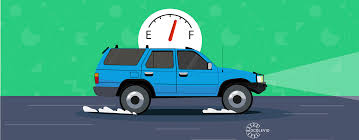



---



In this project, we will first predict a car’s fuel efficiency using traditional Machine Learning techniques implemented in TensorFlow/Keras, and later refine and evaluate the results.
We’ll use a dataset of vehicle characteristics to build and train a regression model that predicts the fuel efficiency (measured in Miles Per Gallon — MPG).



---

##Context
Fuel efficiency is a crucial factor for both environmental and economic reasons. Understanding the relationship between vehicle specifications (like displacement, horsepower, weight, and acceleration) and fuel consumption helps manufacturers design better cars and enables consumers to make informed decisions.
By building a predictive model, we can estimate the MPG of a vehicle before it is even manufactured, aiding in design optimization and emission reduction strategies.



---

## Content
The dataset used in this project comes from the UCI Machine Learning Repository and contains information about various cars from the late 1970s and early 1980s.

Number of Instances: 398

Target Variable: MPG (Miles Per Gallon) — continuous numeric value

Features:

*   Cylinders
*   Displacement
*   Horsepower
*   Weight
*   Acceleration
*   Model Year
*   Origin (categorical)

---


## Project Workflow
In this notebook, we will:
1.   Data Loading & Exploration: Understand the structure and characteristics of the dataset.
2.   Data Cleaning & Preprocessing: Handle missing values, normalize numerical data, and encode categorical variables.
3.   Model Building with TensorFlow/Keras: Train a regression model to predict MPG.
4.   Model Evaluation: Use metrics like MAE (Mean Absolute Error) and visualize prediction accuracy.
5.   Prediction & Interpretation: Test the model with unseen data and interpret results.


























## Importing Important Libraries
First, I’ll install any missing packages and import all the libraries I need for data handling, plotting, and building the model.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Load the Dataset
Downloading the Auto MPG dataset and loading it into a pandas DataFrame so I can work with it.


In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv("/content/fuel-efficiency-data.txt", names=column_names, na_values="?", comment='\t', sep=",", skipinitialspace=True, skiprows=1)

Let’s check out the first few rows to get a feel for what’s inside.

In [5]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [6]:
dataset.shape

(398, 8)

## Data Preprocessing

### Handle Missing Values
If there are any missing values, I’ll drop those rows to keep things simple.


In [ ]:
dataset = dataset.dropna()

### Fix the 'Origin' Column
The 'Origin' column is just numbers right now — I’ll turn it into separate columns for USA, Europe, and Japan.


In [ ]:
origin_mapping = {1: "USA", 2: "Europe", 3: "Japan"}
dataset["Origin"] = dataset["Origin"].map(origin_mapping)
dataset = pd.get_dummies(dataset, columns=["Origin"], prefix="", prefix_sep="")

### Train/Test Split
I’ll keep 80% of the data for training and 20% for testing, so I can see how well the model does on unseen data.


In [ ]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)
train_dataset = train_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

In [ ]:
print(train_dataset.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year'],
      dtype='object')


## Data Visualization
Plotting a few pairwise graphs to see how features relate to each other and to MPG.


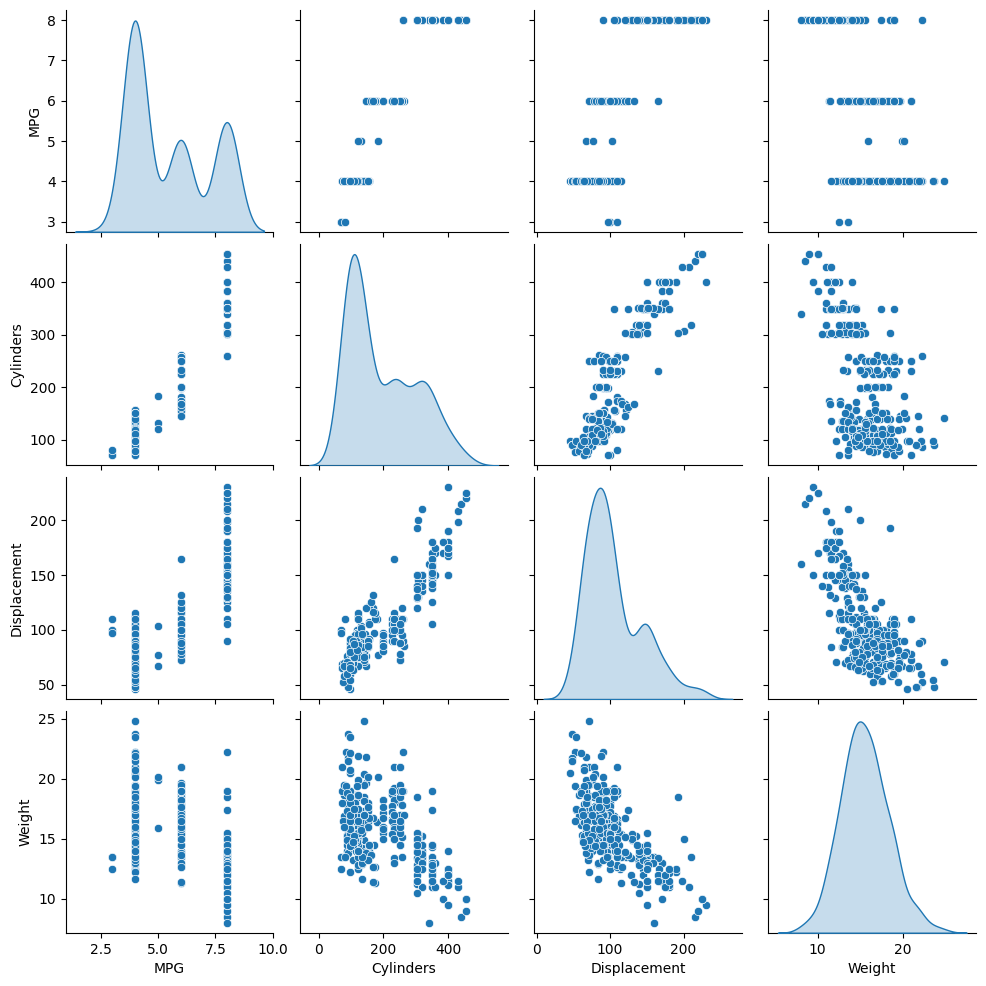

In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
plt.show()

### Split Features and Labels
MPG is the label we want to predict, so I’ll separate it from the other columns.


In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### Summary Stats and Normalization
Checking the average, min, max, and other stats for the training set and scaling the features so they’re easier for the model to learn from.


In [ ]:
# 1. Compute stats from the training data
train_stats = train_dataset.describe().transpose()

# 2. Normalization function
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

# 3. Apply normalization
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

## Build the Model
Creating a simple neural network with TensorFlow/Keras for regression.  
I’ll use a couple of dense layers and keep it small since the dataset isn’t huge.


In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(train_dataset.keys())],
                     kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.1),  # prevent overfitting
        layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        layers.Dropout(0.1),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[ 0.2150917 ],
       [-0.08129596],
       [-0.01933796],
       [ 0.7604194 ],
       [-0.10673822],
       [ 1.3541554 ],
       [ 0.19058928],
       [ 0.44476193],
       [ 0.27023378],
       [ 0.30868888]], dtype=float32)

## Train the Model
Training the model on the training data.  
I’ll also track the validation loss to see if the model is overfitting or improving.


In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(normed_train_data, train_labels,
                    epochs=EPOCHS,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 26.7001 - mean_absolute_error: 4.9259 - mean_squared_error: 26.6677 - val_loss: 21.6588 - val_mean_absolute_error: 4.3756 - val_mean_squared_error: 21.6262
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.0797 - mean_absolute_error: 4.5396 - mean_squared_error: 23.0470 - val_loss: 18.8125 - val_mean_absolute_error: 4.0215 - val_mean_squared_error: 18.7797
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.8911 - mean_absolute_error: 4.2779 - mean_squared_error: 20.8582 - val_loss: 16.1362 - val_mean_absolute_error: 3.6591 - val_mean_squared_error: 16.1030
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.3545 - mean_absolute_error: 3.8136 - mean_squared_error: 17.3212 - val_loss: 13.6714 - val_mean_absolute_error: 3.2941 - val_mean_squared_error: 13.6378
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.3524 - mean_absolute_error: 3.5411 - mean_squared_error: 15.3186 - val_loss: 1

## Training Curves
Plotting how the loss changes over the epochs for both training and validation sets.


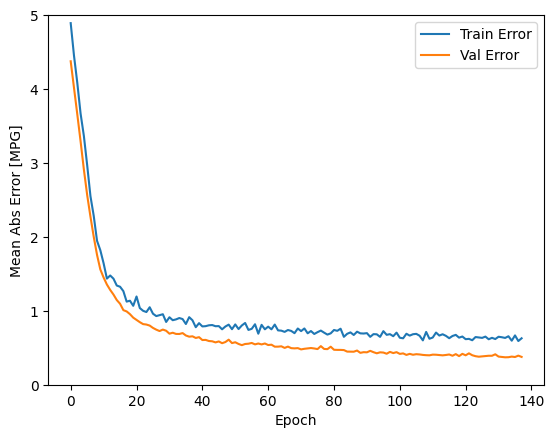

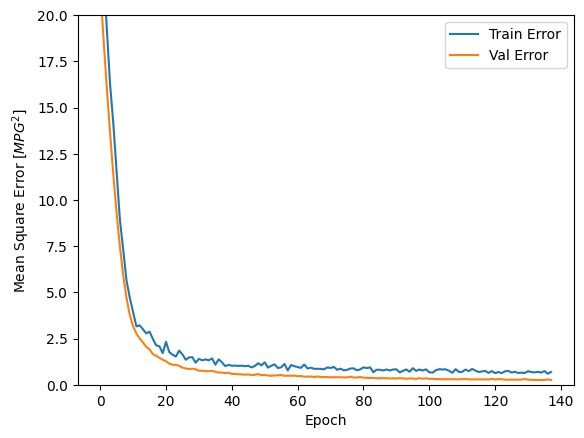

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()
plot_history(history)

## Test the Model
Using the test set to check how good the model’s predictions are.


In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  0.40 MPG


## Predictions vs Actual
Plotting actual MPG values against the model’s predictions to see how close they are.  
If the points are close to the diagonal line, that’s good.


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step 


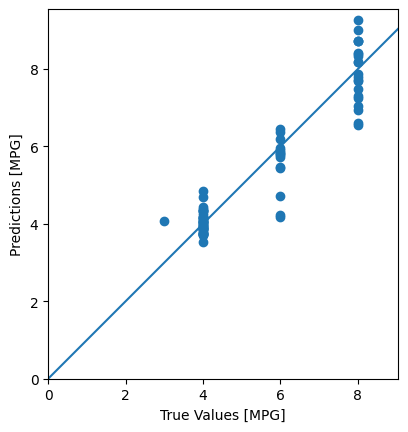

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

### Wrap-Up
The model gives a decent prediction of MPG for the cars in the dataset.  
With more tuning (different layers, more neurons, or more data), it could perform even better.
